In [1]:
import itertools
import numpy as np
import pandas as pd
import scipy.stats as spst
import matplotlib.pyplot as plt

## "true" probability distribution p : multivariate gaussian with mean = [0, 0] and cov = [[1, 0.], [0., 10.]]

In [2]:
mus = np.array([0, 0])
sgs_p = np.array([[1, 0.], [0., 10.]])
xs = np.arange(-10, 10.2, 0.2)
ys = np.arange(-10, 10.2, 0.2)
ans = np.meshgrid(xs, ys)
xrs = ans[0].ravel()
yrs = ans[1].ravel()
xyrs = np.vstack((xrs, yrs)).T

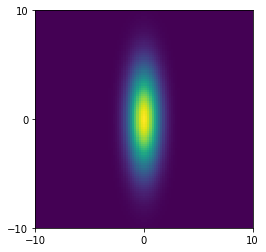

In [3]:
ps = spst.multivariate_normal(mus, cov=sgs_p).pdf(xyrs)
_ = plt.imshow(ps.reshape(101, 101), extent=[-10, 10, -10, 10])
_ = plt.xticks([-10, 0, 10])
_ = plt.yticks([-10, 0, 10])

## approximate distribution q : multivariate gaussian with mean = [0, 0] and cov = [[s, 0.], [0., s]]
## compute KL divergence and reverse KL divegence between p and q, where q is parametrized by s.

In [4]:
n = 50
ss = np.linspace(0.2, 10, n)
klds = np.zeros(n) 
rklds = np.zeros(n) 
for i, s in enumerate(ss):
    sg_qs = np.array([[s, 0], [0, s]])
    qs = spst.multivariate_normal(mus, cov=sg_qs).pdf(xyrs)
    klds[i] = np.inner(ps, np.log(ps/qs))
    rklds[i] = np.inner(qs, np.log(qs/ps))

## find s that minimizes the computed KL divegence and reverse KL divergence.

(-0.02541134324348119, 1.0488291115830228)

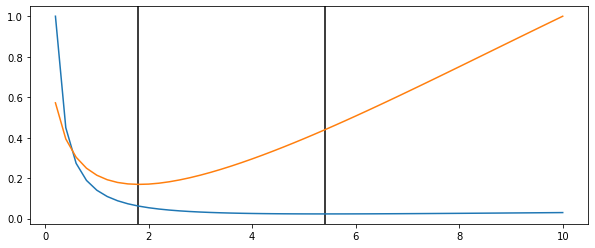

In [9]:
# KL(p || q)
idx = np.argsort(klds)[0]
s1 = ss[idx]

# KL(q || p)
idx = np.argsort(rklds)[0]
s2 = ss[idx]

fig, ax = plt.subplots(1, 1, figsize=(10, 4))
ax.plot(ss, klds / klds.max())
ax.plot(ss, rklds / rklds.max())
ylim = ax.get_ylim()
ax.vlines(x=s1, ymin=ylim[0], ymax=ylim[1])
ax.vlines(x=s2, ymin=ylim[0], ymax=ylim[1])
ax.set_ylim(ylim)

## visualize the obtained approx distributions

In [7]:
q1s = spst.multivariate_normal(mus, cov=np.array([[s1, 0], [0, s1]])).pdf(xyrs)
q2s = spst.multivariate_normal(mus, cov=np.array([[s2, 0], [0, s2]])).pdf(xyrs)

Text(0.5, 1.0, 'reverse KL divergence')

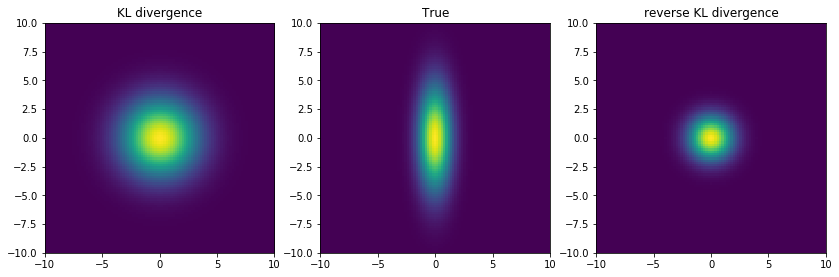

In [8]:
fig, axs = plt.subplots(1, 3, figsize=(14, 8))
axs[0].imshow(q1s.reshape(101, 101), extent=[-10, 10, -10, 10])
axs[1].imshow(ps.reshape(101, 101), extent=[-10, 10, -10, 10])
axs[2].imshow(q2s.reshape(101, 101), extent=[-10, 10, -10, 10])
axs[0].set_title('KL divergence')
axs[1].set_title('True')
axs[2].set_title('reverse KL divergence')